In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Processing & Understanding

In [254]:
import zipfile
with zipfile.ZipFile("loan.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [658]:
data = pd.read_csv('loan.csv',low_memory=False)

In [659]:
## To see all the columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [660]:
data.shape

(39717, 111)

In [661]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [662]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### We can figure out by looking at the dataset as the target variable is "Loan Status" which describes whether the previous member has fully paid, currently paying or defaulted on the loan

##  Data Cleaning

In [663]:
# Finding columns which has more than 0% missing values
missing_cols = round(100*(data.isnull().sum()/len(data.index)), 2)
missing_cols.sort_values(ascending=False)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

**We can see that there are many columns will all null values in it**

** Removing columns with low data (focused on >50%)
 - columns with 100% null values
     - will drop them
 - column next_pymnt_d is next payment date, as its future value will not help us much in understabding the past behaviour
     - will drop it
 - column mths_since_last_record is last public record with 92% null and not much informative information
     - will drop it
 - column mths_since_last_delinq is although 64% null but null value can provide those customers who were non delinquents hence will keep the column
     - will keep it

In [664]:
# Checking number of column with all Null Values in it
columns_with_missing_values = list(missing_cols[missing_cols >= 65].index)

len(columns_with_missing_values)

56

### Droping all the columns which have null values more than 65%

In [665]:
data.drop(columns = columns_with_missing_values,inplace = True)

### Checking if "mths_since_last_delinq" has any correlation with defaulted

<ipython-input-666-672127f3facf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_delinq['isNull']=data_delinq.mths_since_last_delinq.isnull()


array([<AxesSubplot:ylabel='(id, False)'>,
       <AxesSubplot:ylabel='(id, True)'>], dtype=object)

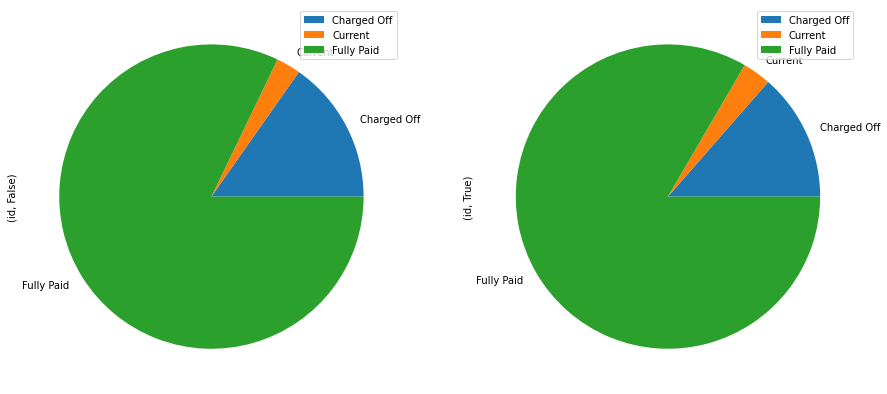

In [666]:
data_delinq=data[['id','loan_status','mths_since_last_delinq']]
data_delinq['isNull']=data_delinq.mths_since_last_delinq.isnull()
data_delinq[['id','isNull','loan_status']].groupby(['isNull','loan_status']).count().unstack('isNull').plot.pie(subplots=True,figsize=(15,15))

#### we can see there not much correlations hence dropping the column

In [667]:
data.drop(columns = ['mths_since_last_delinq'],inplace = True)

### Next we look into columns which have significant null values in it

In [668]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
term                           0.00
issue_d                        0.00
member_id                      0.00
purpose                        0.00
loan_amnt                      0.00
url                            0.00
pymnt_plan                     0.00
funded_amnt                    0.00
loan_status                    0.00
verification_status            0.00
annual_inc                     0.00
home_ownership                 0.00
funded_amnt_inv                0.00
addr_state                     0.00
sub_grade                      0.00
grade                          0.00
installment                 

In [669]:
data[['desc','emp_title','emp_length','pub_rec_bankruptcies','title','purpose']].sample(1000)

,desc,emp_title,emp_length,pub_rec_bankruptcies,title,purpose
38926,I have two high interest credit cards with tha...,ClearPar,2 years,0.0,Consolidate Debt,debt_consolidation
2618,NaN,ibc,2 years,0.0,Debt Consolidation Loan,debt_consolidation
32657,Borrower added on 01/25/10 > I plan to use t...,Indian River State College,10+ years,0.0,Wake Up,debt_consolidation
15485,Borrower added on 05/05/11 > to pay off a ve...,Force Capital Management,4 years,0.0,BF Consolidation Loan,debt_consolidation
20558,NaN,macys,4 years,0.0,Brittani's loan,major_purchase
...,...,...,...,...,...,...
29469,"Borrower added on 05/25/10 > Hello,<br/><br/...",bdo seidman llp,3 years,0.0,Debt consolidation,debt_consolidation
19577,Borrower added on 02/11/11 > I am planning t...,Northern Arizona University,< 1 year,0.0,HVAC and roof replacement,home_improvement
28323,Borrower added on 06/30/10 > Hello! <br/><br...,VMC Consulting,2 years,0.0,Very secure debt consolidation loan,debt_consolidation
12598,NaN,Trinity Health,3 years,0.0,Debt,debt_consolidation


#### Analyzing desc, title & purpose column 

In [670]:
data[['desc','title','purpose']].sample(1000)

,desc,title,purpose
11682,NaN,emergency fund,other
19417,NaN,consolidation,debt_consolidation
4234,Borrower added on 10/28/11 > Will be using f...,Website Purchase,small_business
24850,NaN,Wedding,wedding
29037,Borrower added on 06/08/10 > I'm currently g...,Moving Expenses Loan,other
...,...,...,...
8047,I have a credit score average of 780 and I am ...,Small Business Loan,small_business
23120,NaN,Car Loan,car
32154,Borrower added on 02/12/10 > Thank you for you...,Silver,other
15965,Borrower added on 04/26/11 > I have a good c...,motorcycle,major_purchase


#### Columns like desc, purpose and title all serve more or less the same purpose of explaining why the loan was taken 
#### So according to the analysis we can just keep purpose column and drop column desc 
#### Title has lot of interesting text, but as we are not doing Natural language processing currently that column will not be useful

In [671]:
data.drop(columns = ['desc','title'],inplace = True)

### Analyzing the purpose column

#### Checking unique values in all columns which has fewer % of null values

In [672]:
print("unique values in  emp_title : %d"  % len(data.emp_title.unique()))
print("unique values in emp_length : %d"  % len(data.emp_length.unique()))
print("unique values in revol_util : %d"  % len(data.revol_util.unique()))
print("unique values in last_pymnt_d : %d"  % len(data.last_pymnt_d.unique()))
print("unique values in last_credit_pull_d : %d"  % len(data.last_credit_pull_d.unique()))
print("unique values in collections_12_mths_ex_med : %d"  % len(data.collections_12_mths_ex_med.unique()))
print("unique values in chargeoff_within_12_mths : %d"  % len(data.chargeoff_within_12_mths.unique()))
print("unique values in pub_rec_bankruptcies : %d"  % len(data.pub_rec_bankruptcies.unique()))
print("unique values in tax_liens : %d"  % len(data.tax_liens.unique()))

unique values in  emp_title : 28821
unique values in emp_length : 12
unique values in revol_util : 1090
unique values in last_pymnt_d : 102
unique values in last_credit_pull_d : 107
unique values in collections_12_mths_ex_med : 2
unique values in chargeoff_within_12_mths : 2
unique values in pub_rec_bankruptcies : 4
unique values in tax_liens : 2


#### Clearly we can identify that emp_length, collections_12_mths_ex_med, chargeoff_within_12_mths, pub_rec_bankruptcies, tax_liens are all categorical values as it has very little unique values

#### Lets take a look into those categorical columns

In [673]:
data.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

##### we would require to do some data cleaning on the above column so that we can use it as a numerical categorical column

In [674]:
# Dropping all the rows which have emp_length as null in their columns
#data = data[~data['emp_length'].isnull()]

In [675]:
# extracting numeric values from the string
import re
data['emp_length'] = data['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0] if type(x)==str else x)

In [676]:
data.emp_length.unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [677]:
data.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [678]:
data.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [679]:
data.tax_liens.unique()

array([ 0., nan])

#### Looking at the above result set we can see that above features only have 0 or null values in it. so we can go ahead and safely drop these columns as well from the data set

In [680]:
data.drop(columns = ['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis = 1,inplace = True)

In [681]:
data.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [682]:
data.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [683]:
data[data.pub_rec_bankruptcies.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies
35006,69001,265533,15000,15000,14875.000000,36 months,8.94%,476.58,A,A5,NaN,1,MORTGAGE,110000.0,Not Verified,Sep-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,146xx,NY,7.07,0,Nov-91,1,6,0,7586,52.70%,19,f,0.0,0.0,17135.510230,16992.71,15000.00,2135.51,0.0,0.0,0.0,Jul-12,1919.13,Aug-15,1,INDIVIDUAL,0,0,NaN
35058,59006,154254,3000,3000,2988.236621,36 months,14.26%,102.92,C,C5,NaN,3,MORTGAGE,80800.0,Not Verified,Sep-09,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,775xx,TX,14.97,1,Jul-98,0,13,0,4740,39.50%,23,f,0.0,0.0,3704.997650,3688.85,3000.00,705.00,0.0,0.0,0.0,Oct-12,111.23,Sep-12,1,INDIVIDUAL,0,0,NaN
35362,65426,232106,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,"Infotrieve, Inc.",1,MORTGAGE,60000.0,Not Verified,Aug-09,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,481xx,MI,11.08,0,Aug-95,0,14,0,24220,68.60%,33,f,0.0,0.0,2755.200000,2615.80,2170.35,584.85,0.0,0.0,0.0,Jun-11,131.22,May-16,1,INDIVIDUAL,0,0,NaN
38443,68926,264924,2300,2300,589.605658,36 months,13.17%,77.69,D,D2,UBS,10,RENT,37152.0,Verified,Aug-08,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,moving,088xx,NJ,2.26,0,Dec-97,0,4,0,2211,88.40%,13,f,0.0,0.0,2796.601136,643.50,2300.00,496.60,0.0,0.0,0.0,Sep-11,77.78,May-16,1,INDIVIDUAL,0,0,NaN
38717,69251,267771,6000,6000,500.000000,36 months,8.00%,188.02,A,A3,NaN,1,MORTGAGE,75000.0,Not Verified,May-08,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,441xx,OH,16.08,0,Dec-94,1,16,0,29797,23.20%,39,f,0.0,0.0,6783.750468,565.31,5999.99,768.76,15.0,0.0,0.0,May-11,189.36,May-11,1,INDIVIDUAL,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.000000,36 months,8.07%,78.42,A,A4,FiSite Research,4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.0,0.0,2822.969293,1213.88,2500.00,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10,1,INDIVIDUAL,0,0,NaN
39713,90665,90607,8500,8500,875.000000,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.0,0.0,9913.491822,1020.51,8500.00,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10,1,INDIVIDUAL,0,0,NaN
39714,90395,90390,5000,5000,1325.000000,36 months,8.07%,156.84,A,A4,NaN,1,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,017xx,MA,2.30,0,Oct-98,0,11,0,9698,19.40%,20,f,0.0,0.0,5272.161128,1397.12,5000.00,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,1,INDIVIDUAL,0,0,NaN
39715,90376,89243,5000,5000,650.000000,36 months,7.43%,155.38,A,A2,NaN,1,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,208xx,MD,3.72,0,Nov-88,0,17,0,85607,0.70%,26,f,0.0,0.0,5174.198551,672.66,5000.00,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,1,INDIVIDUAL,0,0,NaN


array([<AxesSubplot:ylabel='(id, 0.0)'>, <AxesSubplot:ylabel='(id, 1.0)'>,
       <AxesSubplot:ylabel='(id, 2.0)'>], dtype=object)

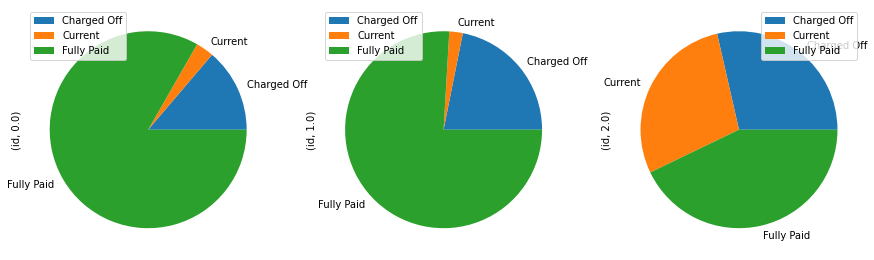

In [684]:
data_pub_bcr=data
data_pub_bcr[['id','pub_rec_bankruptcies','loan_status']].groupby(['pub_rec_bankruptcies','loan_status']).count().unstack('pub_rec_bankruptcies').plot.pie(subplots=True, figsize=(15,15))


#### there might me a trend in increase of pub_rec_bankruptcies will lead to default but as we dont have much data in the 1 and 2 categories so its still not sufficient
    - there is only 7 records in category 2.0
    - data maybe biased

In [685]:
round(100*(data.isnull().sum()/len(data.index)), 2).sort_values(ascending=False)

emp_title                  6.19
emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
last_credit_pull_d         0.01
loan_amnt                  0.00
annual_inc                 0.00
zip_code                   0.00
purpose                    0.00
url                        0.00
pymnt_plan                 0.00
loan_status                0.00
issue_d                    0.00
verification_status        0.00
member_id                  0.00
home_ownership             0.00
funded_amnt                0.00
dti                        0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
addr_state                 0.00
earliest_cr_line           0.00
delinq_2yrs                0.00
delinq_amnt                0.00
acc_now_delinq             0.00
application_type           0.00
policy_c

#### now that most of the columns are non null and removed the mostly emply columns lets fix the data types of the remaining columns

In [686]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

### checking the culumns with object datatype


In [687]:
data.dtypes[data.dtypes=='object']

term                   object
int_rate               object
grade                  object
sub_grade              object
emp_title              object
emp_length             object
home_ownership         object
verification_status    object
issue_d                object
loan_status            object
pymnt_plan             object
url                    object
purpose                object
zip_code               object
addr_state             object
earliest_cr_line       object
revol_util             object
initial_list_status    object
last_pymnt_d           object
last_credit_pull_d     object
application_type       object
dtype: object

In [688]:
data[list(data.dtypes[data.dtypes=='object'].index)].head()

,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,36 months,10.65%,B,B2,NaN,10,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,Jan-85,83.70%,f,Jan-15,May-16,INDIVIDUAL
1,60 months,15.27%,C,C4,Ryder,1,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,Apr-99,9.40%,f,Apr-13,Sep-13,INDIVIDUAL
2,36 months,15.96%,C,C5,NaN,10,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,Nov-01,98.50%,f,Jun-14,May-16,INDIVIDUAL
3,36 months,13.49%,C,C1,AIR RESOURCES BOARD,10,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,Feb-96,21%,f,Jan-15,Apr-16,INDIVIDUAL
4,60 months,12.69%,B,B5,University Medical Group,1,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,Jan-96,53.90%,f,May-16,May-16,INDIVIDUAL


#### Fixing columns like term, int_rate and convert them into integer & float values by removing months & % sign from the columns

In [689]:
# Extracting numeric values from the string
import re
data['term'] = data['term'].apply(lambda x: re.findall('\d+', str(x))[0])
data['int_rate'] = data['int_rate'].apply(lambda x: re.findall('\d+', str(x))[0])
data.revol_util.replace('%','',regex = True,inplace = True)


# Converting above columns datatype from object to int and float respectively
data['term'] = data.term.astype('int64')
data['int_rate'] = data.int_rate.astype('float64')
#data['emp_length'] = pd.to_numeric(data.emp_length).astype('int')
data.revol_util = data.revol_util.astype('float64')

In [690]:
data[list(data.dtypes[data.dtypes=='object'].index)].head()

,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type
0,B,B2,NaN,10,RENT,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,Jan-85,f,Jan-15,May-16,INDIVIDUAL
1,C,C4,Ryder,1,RENT,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,Apr-99,f,Apr-13,Sep-13,INDIVIDUAL
2,C,C5,NaN,10,RENT,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,Nov-01,f,Jun-14,May-16,INDIVIDUAL
3,C,C1,AIR RESOURCES BOARD,10,RENT,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,Feb-96,f,Jan-15,Apr-16,INDIVIDUAL
4,B,B5,University Medical Group,1,RENT,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,Jan-96,f,May-16,May-16,INDIVIDUAL


#### As the numerical columns are fixed now, we can use it for further EDA

#### Next, there are few columns which denote date or month information but are of the type object in the dataframe. Let's change the dtype of all such columns to datetime. Doing so will help in further using these column values to its best for analysis.<br>
#### These columns are:
#### 1. issue_d
#### 2. earliest_cr_line
#### 3. last_pymnt_d
#### 4. last_credit_pull_d

In [691]:
datetime_colmns=['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']
data[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   issue_d             39717 non-null  object
 1   earliest_cr_line    39717 non-null  object
 2   last_pymnt_d        39646 non-null  object
 3   last_credit_pull_d  39715 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


In [692]:
# Converting date columns into Datatime Datatype

data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')
data.earliest_cr_line = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data.last_pymnt_d = pd.to_datetime(data.last_pymnt_d, format='%b-%y')
data.last_credit_pull_d = pd.to_datetime(data.last_credit_pull_d, format='%b-%y')

In [693]:
data[datetime_colmns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   issue_d             39717 non-null  datetime64[ns]
 1   earliest_cr_line    39717 non-null  datetime64[ns]
 2   last_pymnt_d        39646 non-null  datetime64[ns]
 3   last_credit_pull_d  39715 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.2 MB


#### converting rest of them to string

In [694]:
#data[list(data.dtypes[data.dtypes=='object'].index)]=data[list(data.dtypes[data.dtypes=='object'].index)].astype('string')

In [695]:
data.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                                int64
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
pymnt_plan                         object
url                                object
purpose                            object
zip_code                           object
addr_state                         object
dti                               float64
delinq_2yrs                       

#### All the Columns are now in correct data types

#### Checking few more columns

In [696]:
data.policy_code.value_counts()

1    39717
Name: policy_code, dtype: int64

In [697]:
data.acc_now_delinq.value_counts()

0    39717
Name: acc_now_delinq, dtype: int64

In [698]:
data.delinq_amnt.value_counts()

0    39717
Name: delinq_amnt, dtype: int64

#### Looking at the above 3 columns we can see that all the columns have same values in it. so it's better we remove these columns as there is no variations in the data in those columns

In [699]:
data.drop(columns = ['policy_code','acc_now_delinq','delinq_amnt'],axis = 1, inplace = True)

In [700]:
data.pymnt_plan.unique()

array(['n'], dtype=object)

In [701]:
data.initial_list_status.unique()

array(['f'], dtype=object)

In [702]:
data.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

#### As above columns have same values for all the observations we can safely remove these columns from dataframe

In [703]:
data.drop(columns = ['pymnt_plan','initial_list_status','application_type'],axis = 1, inplace = True)

In [704]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.0,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,860xx,AZ,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,309xx,GA,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.0,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,606xx,IL,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,917xx,CA,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.0,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,https://lendingclub.com/browse/loanDetail.acti...,other,972xx,OR,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


#### Looking at the dataframe carefully we identify that many columns are customer specific data like url, zip_code,addr_state which are not useful to determine whether the person can default on loan or not, so it's better to remove those columns from dataframe

In [705]:
data.drop(columns = ['url','addr_state','zip_code'],axis = 1, inplace = True)

In [706]:
data.shape

(39717, 40)

In [707]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.0,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.0,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.0,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0


#### Drop duplicates row if any

In [708]:
data.shape

(39717, 40)

In [709]:
data=data.drop_duplicates()

In [710]:
data.shape

(39717, 40)

#### issue_d: The month which the loan was funded . Let's split the available date into month and year column for more detailed analysis in future

In [711]:
data['issue_d_month'] = data['issue_d'].dt.month
data['issue_d_year'] = data['issue_d'].dt.year

In [712]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36,10.0,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.0,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.0,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,0,1996-01-01,0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,12,2011


#### Deep diving on more columns which may not be required for analysis

In [713]:
data.groupby('loan_status')['out_prncp'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00
Current,1140.0,1784.752632,1345.871778,10.26,692.575,1521.025,2542.9675,6311.47
Fully Paid,32950.0,0.000000,0.000000,0.00,0.000,0.000,0.0000,0.00


#### We can see that values for out_prncp i.e. Outstanding Principal amount is only present in Current type of loans, and we won't be considering current on-going loans for our analysis as it wont help us decide/factor whether the memeber will default or not

In [714]:
data.groupby('loan_status')['out_prncp_inv'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00
Current,1140.0,1776.456684,1343.456758,10.26,680.4825,1500.78,2540.8375,6307.37
Fully Paid,32950.0,0.000000,0.000000,0.00,0.0000,0.00,0.0000,0.00


#### Same with out_prncp_inv column, Let's drop both the columns then

In [715]:
data.drop(columns = ['out_prncp','out_prncp_inv'],axis = 1,inplace = True)

In [716]:
data.shape

(39717, 40)

In [717]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36,10.0,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,27.65,0,1985-01-01,1,3,0,13648,83.7,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,1.00,0,1999-04-01,5,3,0,1687,9.4,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.0,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,8.72,0,2001-11-01,2,2,0,2956,98.5,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,20.00,0,1996-02-01,1,10,0,5598,21.0,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
4,1075358,1311748,3000,3000,3000.0,60,12.0,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,other,17.94,0,1996-01-01,0,15,0,27783,53.9,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,12,2011


### Now We think that the dataframe is clean to a respectable context, after this we can start our Data Analysis

## Data Analysis

As our objective in the case study is to  identify predictors of default so that at the time of loan application, we can use those variables for approval/rejection of the loan. <br>

Now, According by our understanding in banking domain,We can identify three types of variables:<br>
1) Applicant Demographic variables like emp_length, emp_titile,home ownership, etc <br>
2) Loan descriptions like amount of loan, interest rate, purpose of loan, etc <br>
3) Customer behaviour features, these featuresare generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc<br>

For now, the customer behaviour variables are not available at the time of new loan application/New Customer, and thus they cannot be used as predictors for credit approval for this dataset


#### Below we feel are identified customer behaviour columns which are not available when new loan application or new customer is processed

In [718]:
cust_behaviour_cols =  ["delinq_2yrs",
                      "earliest_cr_line",
                      "inq_last_6mths",
                      "open_acc",
                      "pub_rec",
                      "revol_bal",
                      "revol_util",
                      "total_acc",
                      "total_pymnt",
                      "total_pymnt_inv",
                      "total_rec_prncp",
                      "total_rec_int",
                      "total_rec_late_fee",
                      "recoveries",
                      "collection_recovery_fee"
                       ]
cust_behaviour_cols

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee']

In [719]:
# Removing the behaviour variables from the dataset

clean_data = data.drop(cust_behaviour_cols, axis=1)
clean_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'dti', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year'],
      dtype='object')

#### Let's try checking for some co-relations between numerical columns

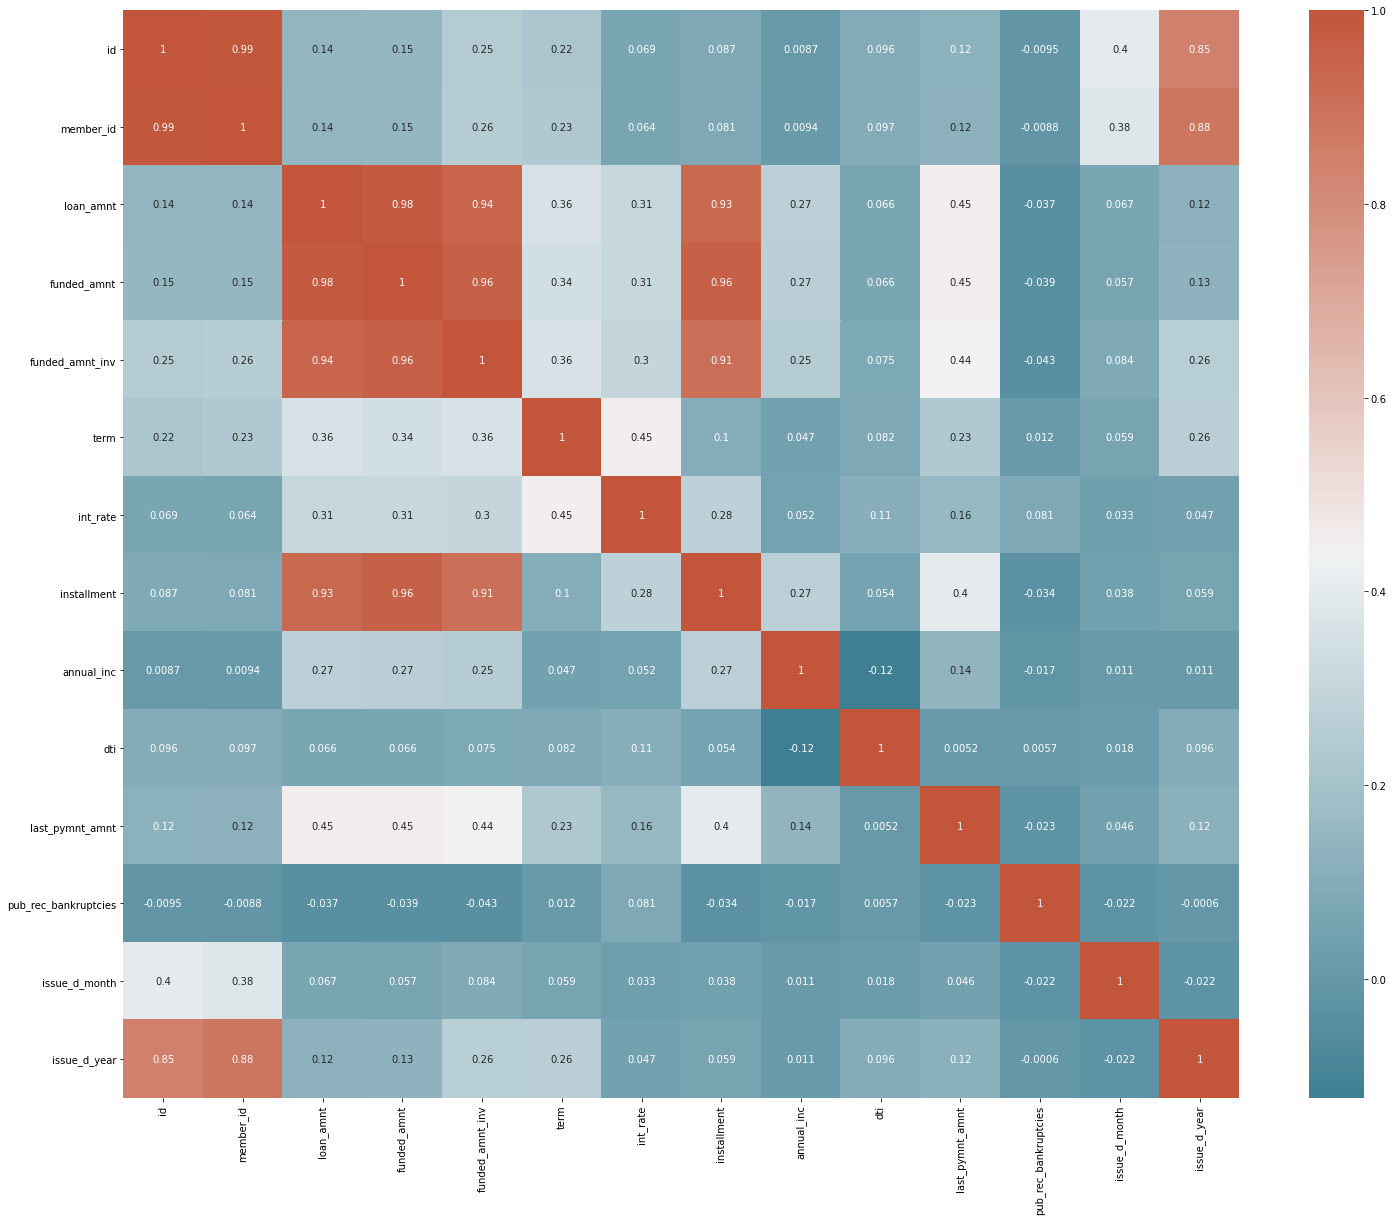

In [720]:
plt.figure(figsize = (25,20))
corr = clean_data.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns, annot = True, 
            cmap = sns.diverging_palette(220,20,as_cmap = True))
plt.show()

## Univariate Analysis

In [721]:
clean_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

#### We can determine that loan_status column describes whether member had fully Paid or Defaulted the previous loan

#### Fully Paid & Charged off observations are what we are looking for, we need to exclude current as the loan is neither deafaulted or fully paid yet

In [722]:
clean_data = clean_data[clean_data.loan_status.isin(['Fully Paid','Charged Off'])]

In [723]:
clean_data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [724]:
clean_data.loan_status.value_counts(normalize = True)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

#### By the above metrics we can conclude that 14% ~ defaulted on loan in the current dataset

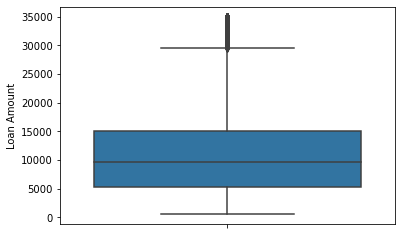

In [725]:
sns.boxplot( y=clean_data["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

#### The loan amount varies from 0 to 35,000 having mean of 10,000

#### Lets convert the loan status into numerical categorical column for easier use

In [726]:
mapper = {'Fully Paid': 0, 'Charged Off': 1}

In [727]:
clean_data.loan_status = clean_data.loan_status.apply(lambda x: mapper[x])

In [728]:
clean_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36,10.0,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,2015-01-01,171.62,2016-05-01,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.0,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,2011-12-01,1,car,1.00,2013-04-01,119.66,2013-09-01,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.0,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,0,small_business,8.72,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,0,other,20.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.0,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,0,wedding,11.20,2015-01-01,161.03,2016-01-01,0.0,12,2011


### Now let's identify what are categorical features and what are numerical features available with us in the dataframe

In [729]:
# For identifying list of categorical columns

data = []
for row in clean_data.columns.tolist():
    data.append({'column': row, 'count': len(clean_data[row].unique())})

In [730]:
unique = pd.DataFrame(data).sort_values('count')

unique.head(15)

,column,count
16,loan_status,2
5,term,2
14,verification_status,3
22,pub_rec_bankruptcies,4
12,home_ownership,5
24,issue_d_year,5
8,grade,7
11,emp_length,11
23,issue_d_month,12
17,purpose,14


#### List of identified Categorical Features for <mark>Univariate Analysis</mark> are as follows:<br>
      
    Ordered:
    1. term
    2. grade
    3. sub_grade
    4. emp_length
    5. issue_d_year
    6. issue_d_month
    
    Unordered:
    1. home_ownership
    2. purpose
    3. verification_status


#### To get a better understanding of features and concluding them as <mark> driving factors (or driver variables) </mark> customers needs to be splitted into 2 dataframes, for each feature we will visualize the distribution of data going further

In [731]:
fully_paid_data = clean_data[clean_data.loan_status == 0]
defaulted_data = clean_data[clean_data.loan_status == 1]

In [732]:
def PlotCatVar(var):
    fig, axarr = plt.subplots(1,2, figsize=(12, 6))

    sns.countplot(fully_paid_data[var], ax=axarr[0])

    axarr[0].set_title("Fully Paid Customers", fontsize=18)

    sns.countplot(defaulted_data[var], ax=axarr[1])

    axarr[1].set_title("Defaulted Customers", fontsize=18)
    fig.tight_layout()
    plt.show()

In [784]:
def PiePlotCatVar(var,Ordered=True, ascending=True):
    fig, axarr = plt.subplots(2,2, figsize=(12, 12))
    
    fully_paied_counts=fully_paid_data[var].value_counts()
    defaulted_count=defaulted_data[var].value_counts()
    if Ordered:
        fully_paied_counts=fully_paied_counts.sort_index(ascending=ascending)
        defaulted_count=defaulted_count.sort_index(ascending=ascending)
    else:
        fully_paied_counts=fully_paied_counts.sort_values(ascending=ascending)
        defaulted_count=defaulted_count.sort_values(ascending=ascending)
    
    wedges, texts =axarr[0][0].pie(fully_paied_counts,labels= round(fully_paied_counts/fully_paied_counts.sum()*100,2).apply(lambda x:str(x)+"%"))
    axarr[0][0].legend(wedges, fully_paied_counts.index,
          title=str(var),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    sns.countplot(fully_paid_data[var], ax=axarr[1][0], order=fully_paied_counts.index)
    
    axarr[0][0].set_title("Fully Paid Customers("+str(var)+")", fontsize=18)
    
    
    
    wedges, texts = axarr[0][1].pie(defaulted_count,labels= round(defaulted_count/defaulted_count.sum()*100,2).apply(lambda x:str(x)+"%"))
    
    axarr[0][1].legend(wedges, defaulted_count.index,
          title=str(var),
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
    
    sns.countplot(defaulted_data[var].sort_index(ascending=ascending),ax=axarr[1][1], order = defaulted_count.index)
    
    axarr[0][1].set_title("Defaulted Customers("+str(var)+")", fontsize=18)
    
    fig.tight_layout()
    plt.show()

In [812]:
def PlotBigCatVar(var, orient='h'):
    if orient=='v':
        fig, axarr = plt.subplots(1,2, figsize=(12, 6))
    else:
        fig, axarr = plt.subplots(2,1, figsize=(12, 6))
        
    if orient =='v':
        sns.countplot(data=fully_paid_data[[var]].sort_values(var), ax=axarr[0],y=var)
    else:
        sns.countplot(fully_paid_data[var].sort_values(), ax=axarr[0])

    axarr[0].set_title("Fully Paid Customers", fontsize=18)
    
    if orient =='v':
        sns.countplot(data=defaulted_data[[var]].sort_values(var), ax=axarr[1],y=var)
    else:
        sns.countplot(defaulted_data[var].sort_values(), ax=axarr[1])


    

    axarr[1].set_title("Defaulted Customers", fontsize=18)
    fig.tight_layout()
    plt.show()

### Column - Term

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


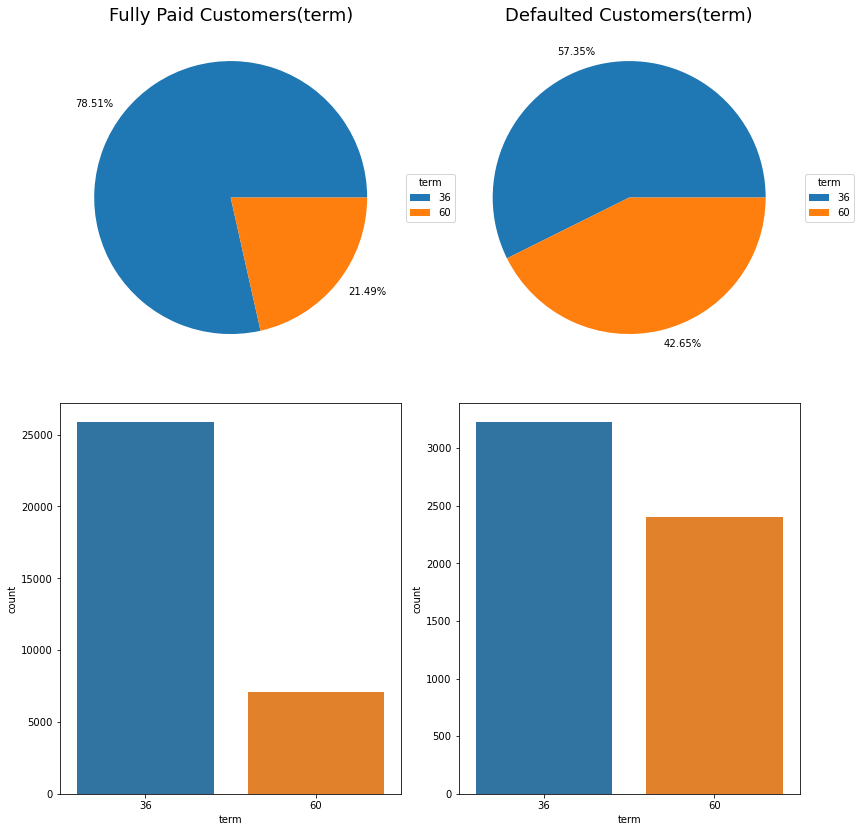



loan_status  term
0            36      25869
             60       7081
1            36       3227
             60       2400
Name: term, dtype: int64


In [786]:
PiePlotCatVar('term')
print('\n')
print(clean_data.groupby(by = 'loan_status').term.value_counts(dropna = False).sort_index())


**Initial Univariate Analysis:** By looking at the above result set we can figure out that both Fully Paid & Defaulted customers apply for loan equally for 36 months,

**But an interesting thing to notice is that Defaulted customers apply with term of 60 months more than Fully Paid,** <mark> The reason could, installments are lower as the term increases, so the possible reason could be to pay low installment with a intension to stop paying in future </mark> 



### Column - grade

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


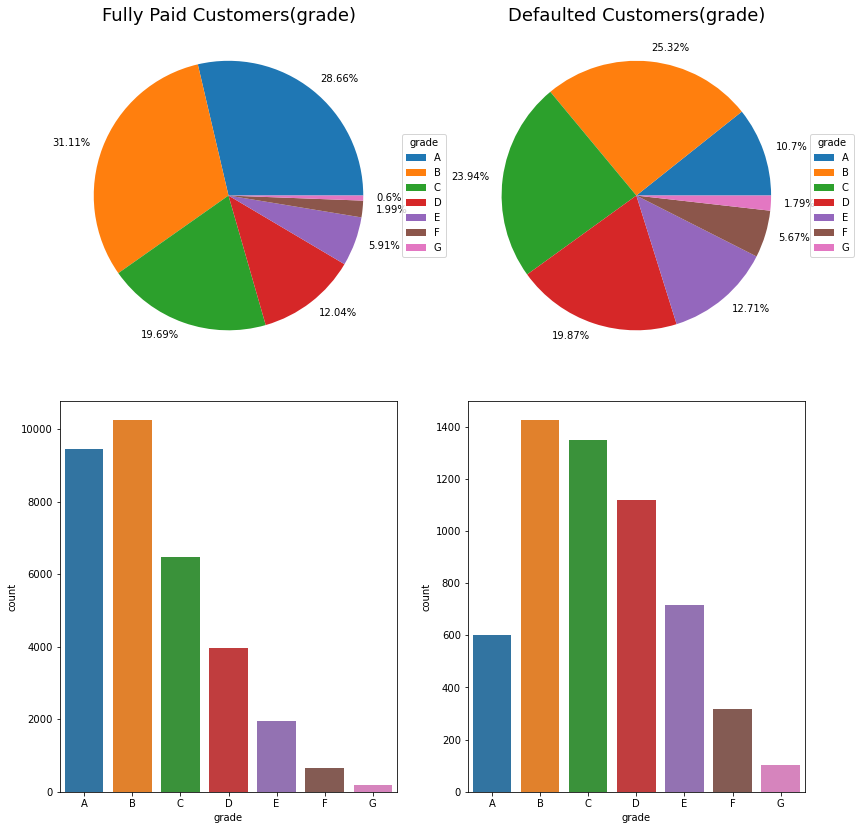

In [787]:
PiePlotCatVar('grade')

#### Initial Univariate Analysis: most of the Defaulted applicants belong to Grade C and D and less in A

### Column - sub_grade

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


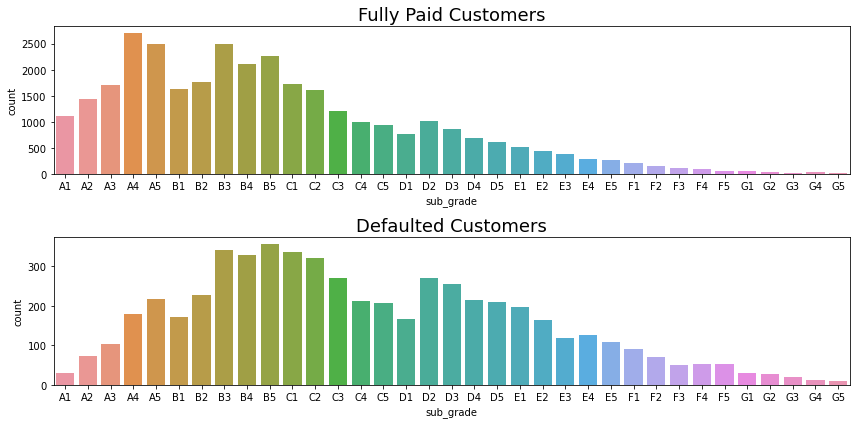

In [788]:
PlotBigCatVar('sub_grade')

#### Initial Univariate Analysis: of the Grade B, C and D, most of the Defaulted applicants belong to Sub Grades

### Column - emp_length

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


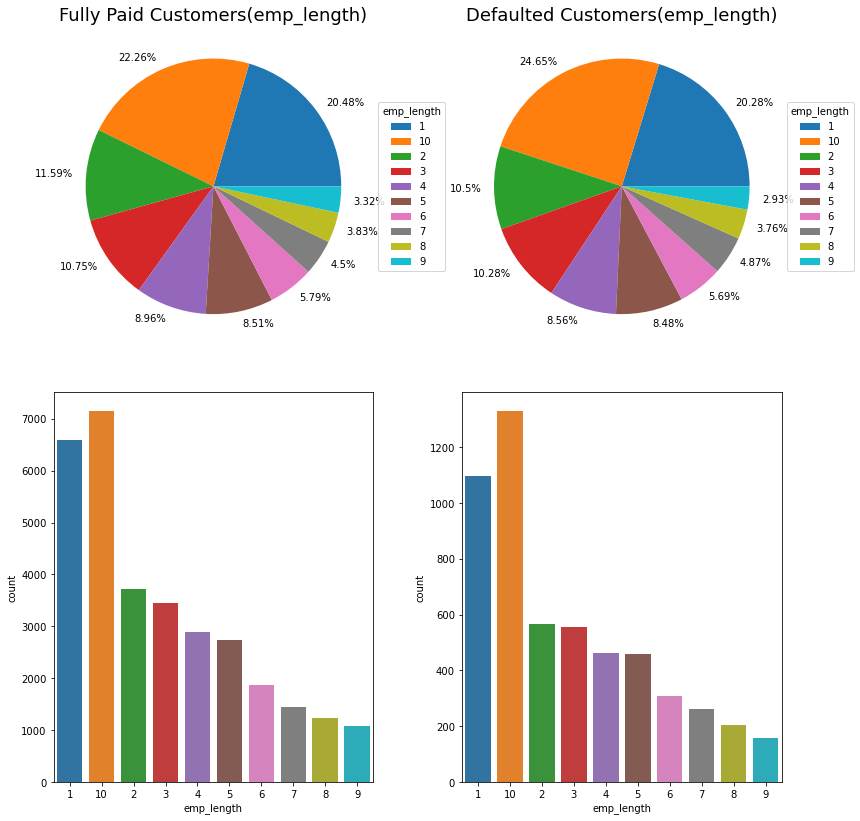

In [789]:
PiePlotCatVar('emp_length')

#### Initial Univariate Analysis: Most Defaulted Customers have employee experience of 10 years & 1 year, 
    - probable because 10 is actually 10 or more so the data is more concentrated in that region

### Column - issue_d_year

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


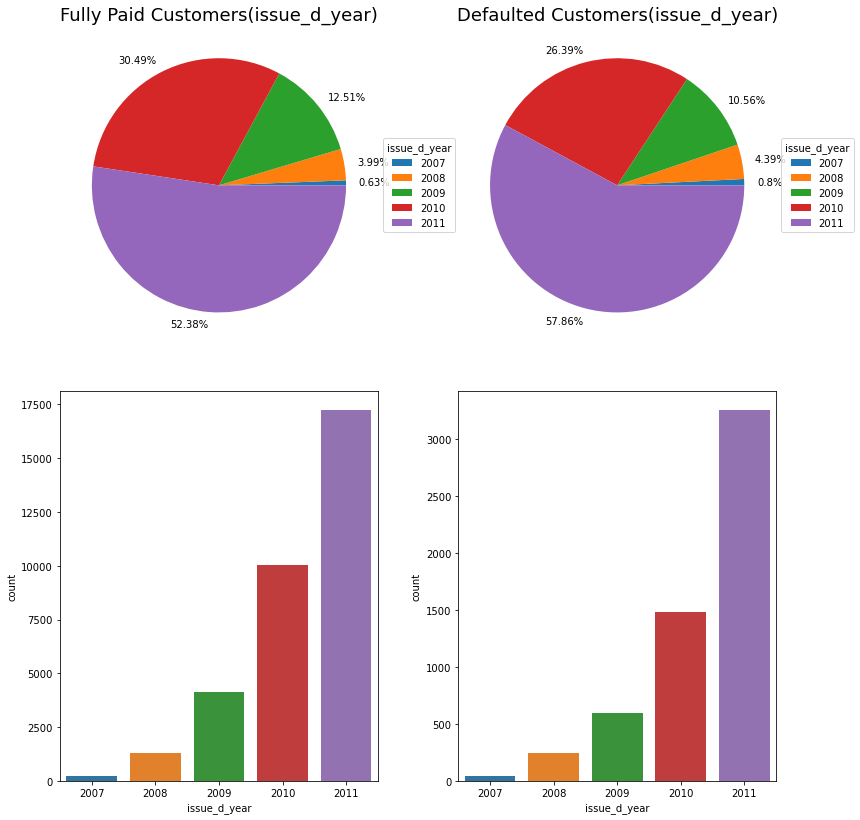

In [790]:
PiePlotCatVar('issue_d_year')

#### There is slightly increase in defaulters in 2011

### Column - issue_d_month

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


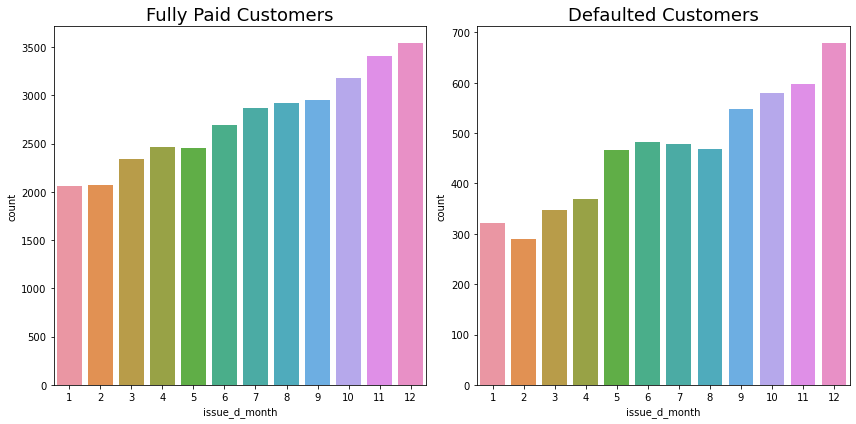

In [791]:
PlotCatVar('issue_d_month')

#### Initial Univariate Analysis: most of the Defaulted applicants took loan on December or towards Q4 

### Column - home_ownership

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


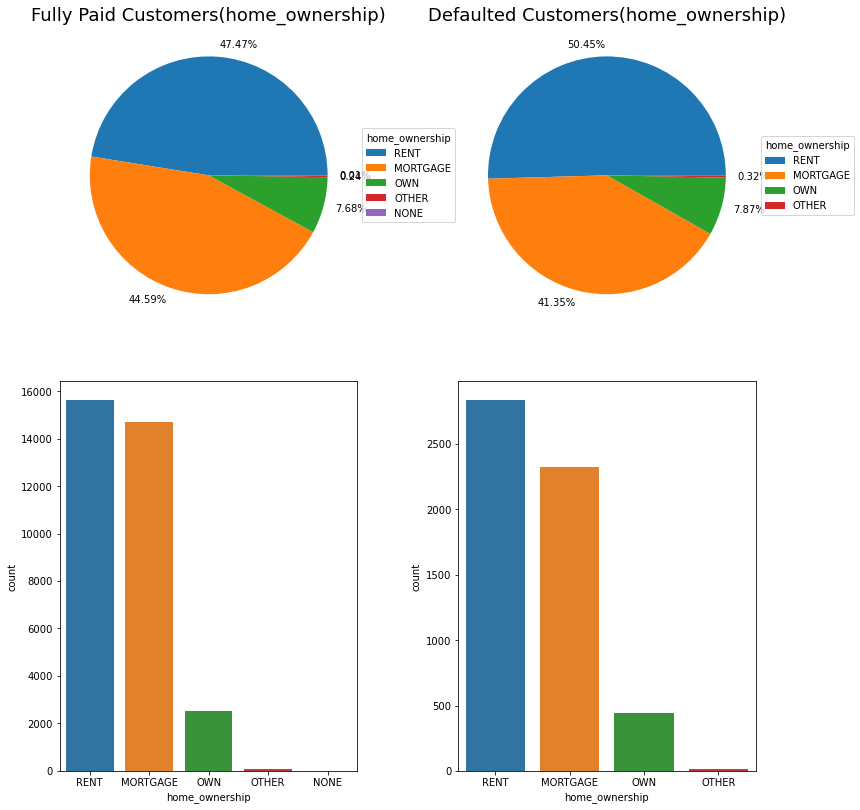

In [792]:
PiePlotCatVar('home_ownership',Ordered=False,ascending=False)

#### Initial Univariate Analysis: most of the Defaulted applicants are staying on Rent Or Mortgage
    - looking at the pie chart there is a slight positive trends to default if the applicent is on rent and if the applicant in on Mortgage then more likely to pay than default

In [793]:
fully_paid_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1077501,1296599,5000,5000,4975.0,36,10.0,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,0,credit_card,27.65,2015-01-01,171.62,2016-05-01,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.0,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,2011-12-01,0,small_business,8.72,2014-06-01,649.91,2016-05-01,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.0,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,0,other,20.00,2015-01-01,357.48,2016-04-01,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.0,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,2011-12-01,0,wedding,11.20,2015-01-01,161.03,2016-01-01,0.0,12,2011
6,1069639,1304742,7000,7000,7000.0,60,15.0,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,2011-12-01,0,debt_consolidation,23.51,2016-05-01,1313.76,2016-05-01,0.0,12,2011


### analyze the installment/anual income ratio to see if any patern arise

In [795]:
fully_paid_data['installment_income_ratio']=fully_paid_data.installment/fully_paid_data.annual_inc
defaulted_data['installment_income_ratio']=defaulted_data.installment/defaulted_data.annual_inc


<ipython-input-795-663eadacccce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fully_paid_data['installment_income_ratio']=fully_paid_data.installment/fully_paid_data.annual_inc
<ipython-input-795-663eadacccce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted_data['installment_income_ratio']=defaulted_data.installment/defaulted_data.annual_inc


<AxesSubplot:ylabel='Density'>

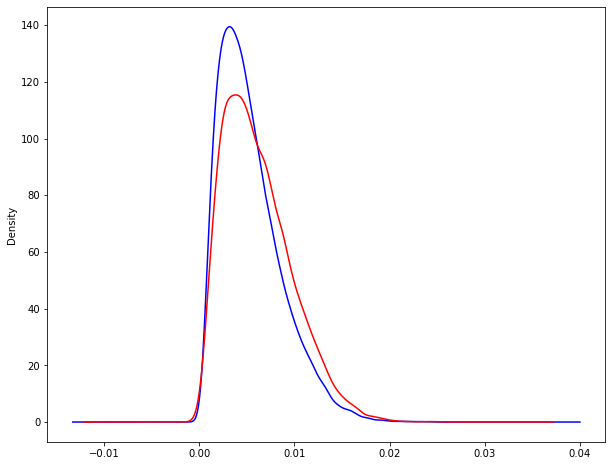

In [798]:
plt.figure(figsize = (10,8))
fully_paid_data.installment_income_ratio.plot(kind = 'density',color = 'blue')
defaulted_data.installment_income_ratio.plot(kind = 'density',color = 'red')

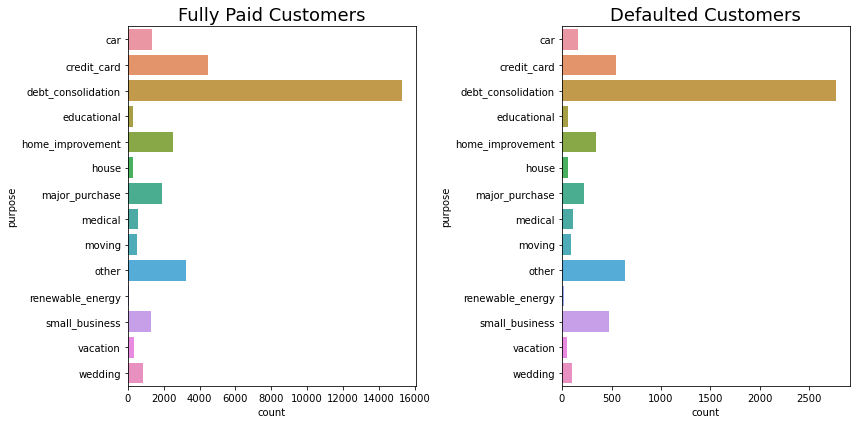

In [813]:
PlotBigCatVar('purpose','v')

#### purpose that tends to default
    - small_business
#### purpose that tends to default less
    - credit card
    - weddings
    - car

C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\anirkar\Miniconda3\envs\ljmu\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


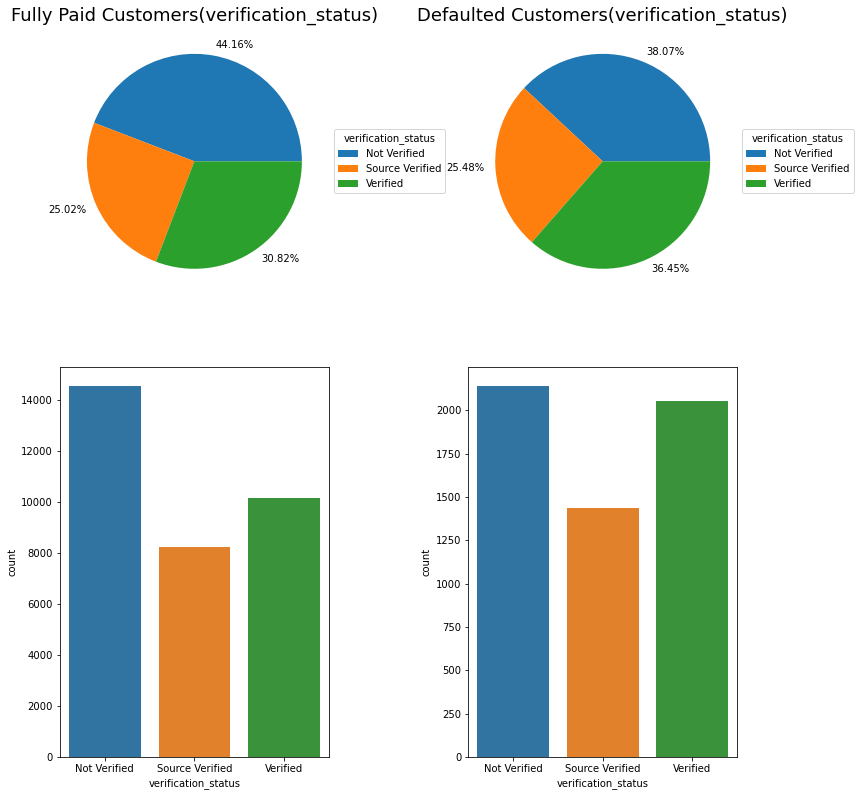

In [814]:
PiePlotCatVar('verification_status')

#### Strengely verified applicants are more likely to default

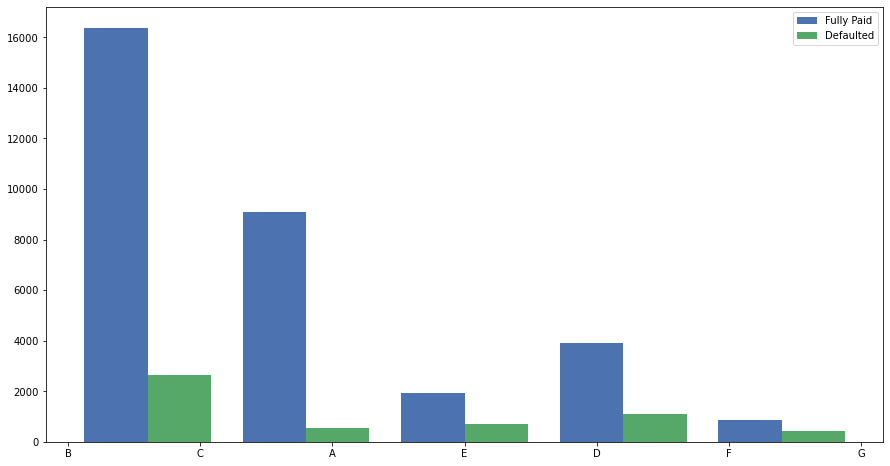

In [ ]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-deep')

x = fully_paid_data.grade
y = defaulted_data.grade
bins = np.linspace(-10, 10, 30)

plt.hist([x, y],bins = 5, label=['Fully Paid', 'Defaulted'])
plt.legend(loc='upper right')
plt.show()

#### After Coverting Loan_status into numerical, next we will split the the observations into 2 datasets, 1) data set for Full Paid Status and 2) Defaulted members

In [ ]:
fully_paid_data = clean_data[clean_data.loan_status == 0]
defaulted_data = clean_data[clean_data.loan_status == 1]

In [ ]:
dt = round(fully_paid_data._get_numeric_data().median(),4)
df = dt.to_frame() 
df.transpose()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,648522.0,829281.0,9600.0,9450.0,8741.0424,36.0,11.0,277.7,60000.0,0.0,13.21,0.0,1.0,9.0,0.0,8773.0,47.8,21.0,10777.3062,876.96,7.0,1998.0,7.0,2011.0


In [ ]:
dt = round(defaulted_data._get_numeric_data().median(),4)
df = dt.to_frame() 
df.transpose()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_amnt,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,696188.0,887329.0,10000.0,10000.0,9575.0,36.0,13.0,297.53,54000.0,1.0,14.29,0.0,1.0,9.0,0.0,9332.0,58.7,20.0,4919.85,241.29,7.0,1998.0,8.0,2011.0


#### Transposing and finding median of each continous numerical columns in both the dataset. We can then plot the values of each column from both dataset and find the distribution for fully paid and defaulted members

#### Let's find the spread of loan amounts using a scatter plot

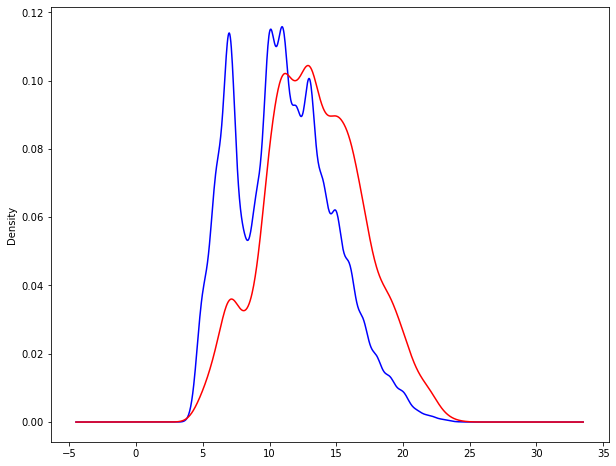

In [ ]:
plt.figure(figsize = (10,8))
fully_paid_data.int_rate.plot(kind = 'density',color = 'blue')
defaulted_data.int_rate.plot(kind = 'density',color = 'red')

In [ ]:
def calc_iv(df, feature, target, pr=False):
    """
    Set pr=True to enable printing of output.
    
    Output: 
      * iv: float,
      * data: pandas.DataFrame
    """

    lst = []

    df[feature] = df[feature].fillna("NULL")

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature,                                                        # Variable
                    val,                                                            # Value
                    df[df[feature] == val].count()[feature],                        # All
                    df[(df[feature] == val) & (df[target] == 0)].count()[feature],  # Good (think: Fraud == 0)
                    df[(df[feature] == val) & (df[target] == 1)].count()[feature]]) # Bad (think: Fraud == 1)

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Good', 'Bad'])

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])

    data = data.replace({'WoE': {np.inf: 0, -np.inf: 0}})

    data['IV'] = data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])

    data = data.sort_values(by=['Variable', 'Value'], ascending=[True, True])
    data.index = range(len(data.index))

    if pr:
        print(data)
        print('IV = ', data['IV'].sum())


    iv = data['IV'].sum()
    # print(iv)

    return iv, data

In [ ]:
df = clean_data.sample(7777).copy()

iv, data = calc_iv(df, 'loan_status', 'dti')

In [ ]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
24725,596503,765729,3600,3600,3600.000000,60,18.0,92.74,F,F2,True Grits School Uniforms,8,OWN,52800.0,Source Verified,2010-10-01,0,other,10.59,1,1996-05-01,2,12,0,9295,98.90,33,5076.114545,2013-08-01,1815.16,2016-01-01,5,1996,10,2010
38045,365831,374099,9600,9600,6501.642393,36,9.0,306.98,A,A5,"A H Spann & Assoc-Eastland Columbus, Inc",1,MORTGAGE,48000.0,Verified,2008-12-01,0,credit_card,14.54,0,1988-09-01,0,9,0,3865,34.20,23,11051.194440,2011-12-01,342.59,2016-05-01,9,1988,12,2008
30743,503891,648610,3000,3000,3000.000000,36,12.0,100.70,C,C1,Cardinal IG,2,RENT,38688.0,Verified,2010-04-01,0,major_purchase,2.67,0,1999-06-01,3,4,0,0,7.43,19,3417.188882,2011-09-01,1908.69,2016-05-01,6,1999,4,2010
3107,1009492,1236235,10000,10000,10000.000000,36,14.0,343.09,C,C2,East Jersey State Prison,1,RENT,40992.0,Source Verified,2011-11-01,0,debt_consolidation,17.54,1,1996-11-01,1,6,0,10267,53.80,11,10971.574760,2012-09-01,8227.41,2014-02-01,11,1996,11,2011
37318,383869,414464,8400,8400,8338.999255,36,9.0,268.36,A,A4,NaN,4,RENT,189996.0,Not Verified,2009-03-01,0,car,1.05,0,1998-06-01,0,5,0,2009,9.10,13,9660.633781,2012-03-01,305.40,2012-03-01,6,1998,3,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11712,809480,1016306,9000,9000,9000.000000,36,10.0,294.61,B,B3,Grimshaw Architects,2,RENT,51000.0,Not Verified,2011-07-01,0,debt_consolidation,6.12,0,1998-11-01,0,7,0,9610,24.00,9,10605.783350,2014-07-01,329.04,2014-07-01,11,1998,7,2011
6740,892816,1109832,4000,4000,4000.000000,36,12.0,133.67,B,B4,Credit Central,1,RENT,21864.0,Source Verified,2011-09-01,0,debt_consolidation,11.53,0,2008-02-01,0,5,0,0,0.00,5,4590.750289,2013-04-01,2320.09,2016-05-01,2,2008,9,2011
31699,492140,629271,25000,25000,22725.000000,36,10.0,809.62,B,B2,Internal Revenue Service,10,RENT,82000.0,Not Verified,2010-03-01,0,other,2.49,0,1995-07-01,0,6,0,8185,8.30,15,28326.220880,2012-01-01,3293.61,2012-01-01,7,1995,3,2010
26806,563176,724683,5500,5500,5450.000000,60,13.0,125.80,C,C1,EL DORADO FURNITURE,1,RENT,24000.0,Not Verified,2010-08-01,0,debt_consolidation,23.85,0,1994-11-01,1,8,0,5089,82.10,14,7349.163569,2014-03-01,2074.08,2014-04-01,11,1994,8,2010


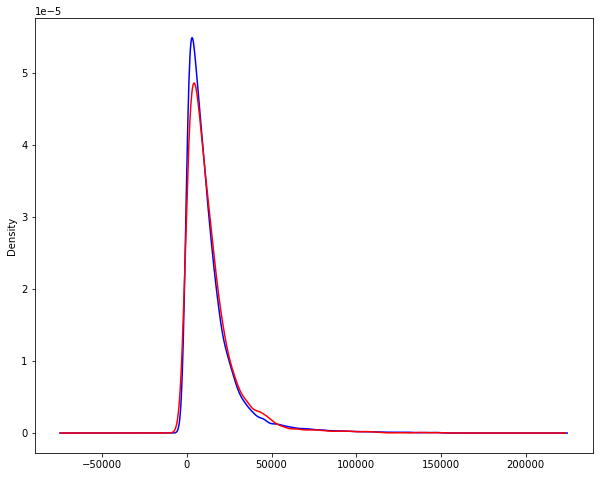

In [ ]:
plt.figure(figsize = (10,8))
fully_paid_data.revol_bal.plot(kind = 'density',color = 'blue')
defaulted_data.revol_bal.plot(kind = 'density',color = 'red')

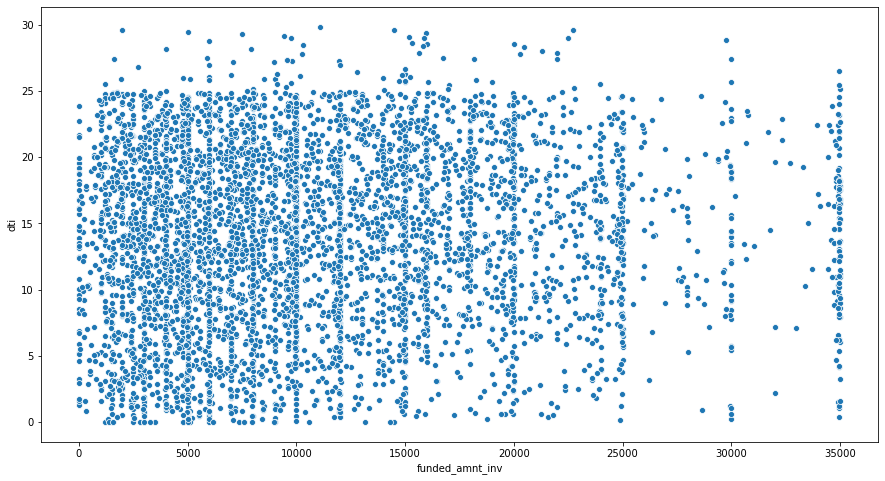

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(defaulted_data['funded_amnt_inv'],defaulted_data['dti'],estimator = np.median)
plt.show()

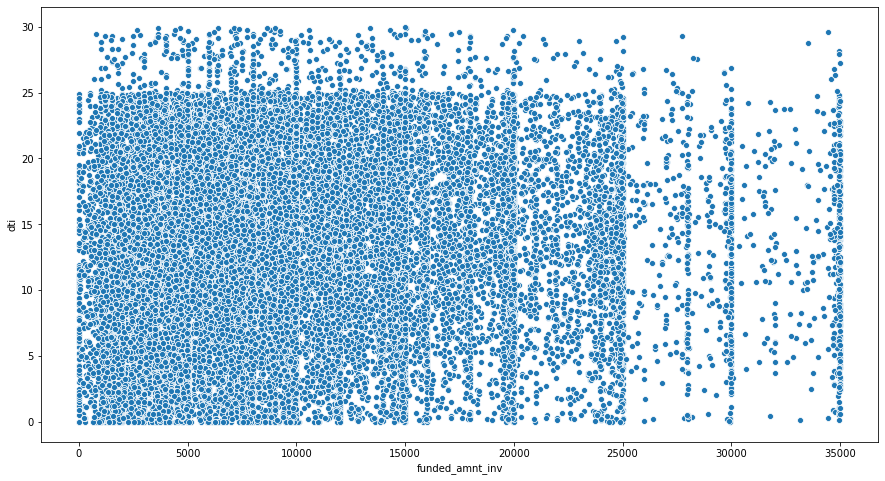

In [ ]:
plt.figure(figsize = (15,8))
sns.scatterplot(fully_paid_data['funded_amnt_inv'],fully_paid_data['dti'],estimator = np.average)
plt.show()

### Column - loan_amnt

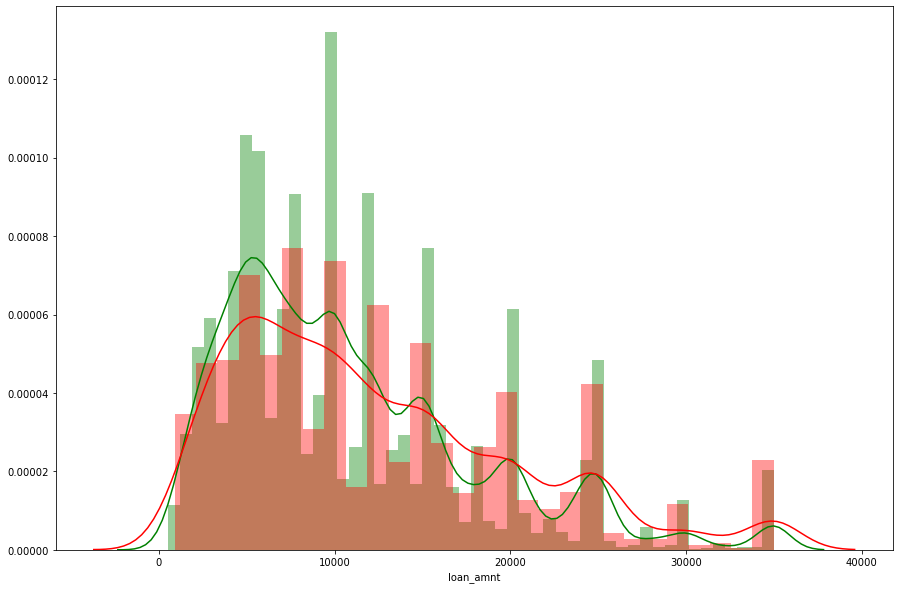

In [ ]:
# plotting default rates across grade of the loan
plt.figure(figsize = (15,10))
sns.distplot(fully_paid_data.loan_amnt,color = 'green')
sns.distplot(defaulted_data.loan_amnt,color = 'red')
plt.show()

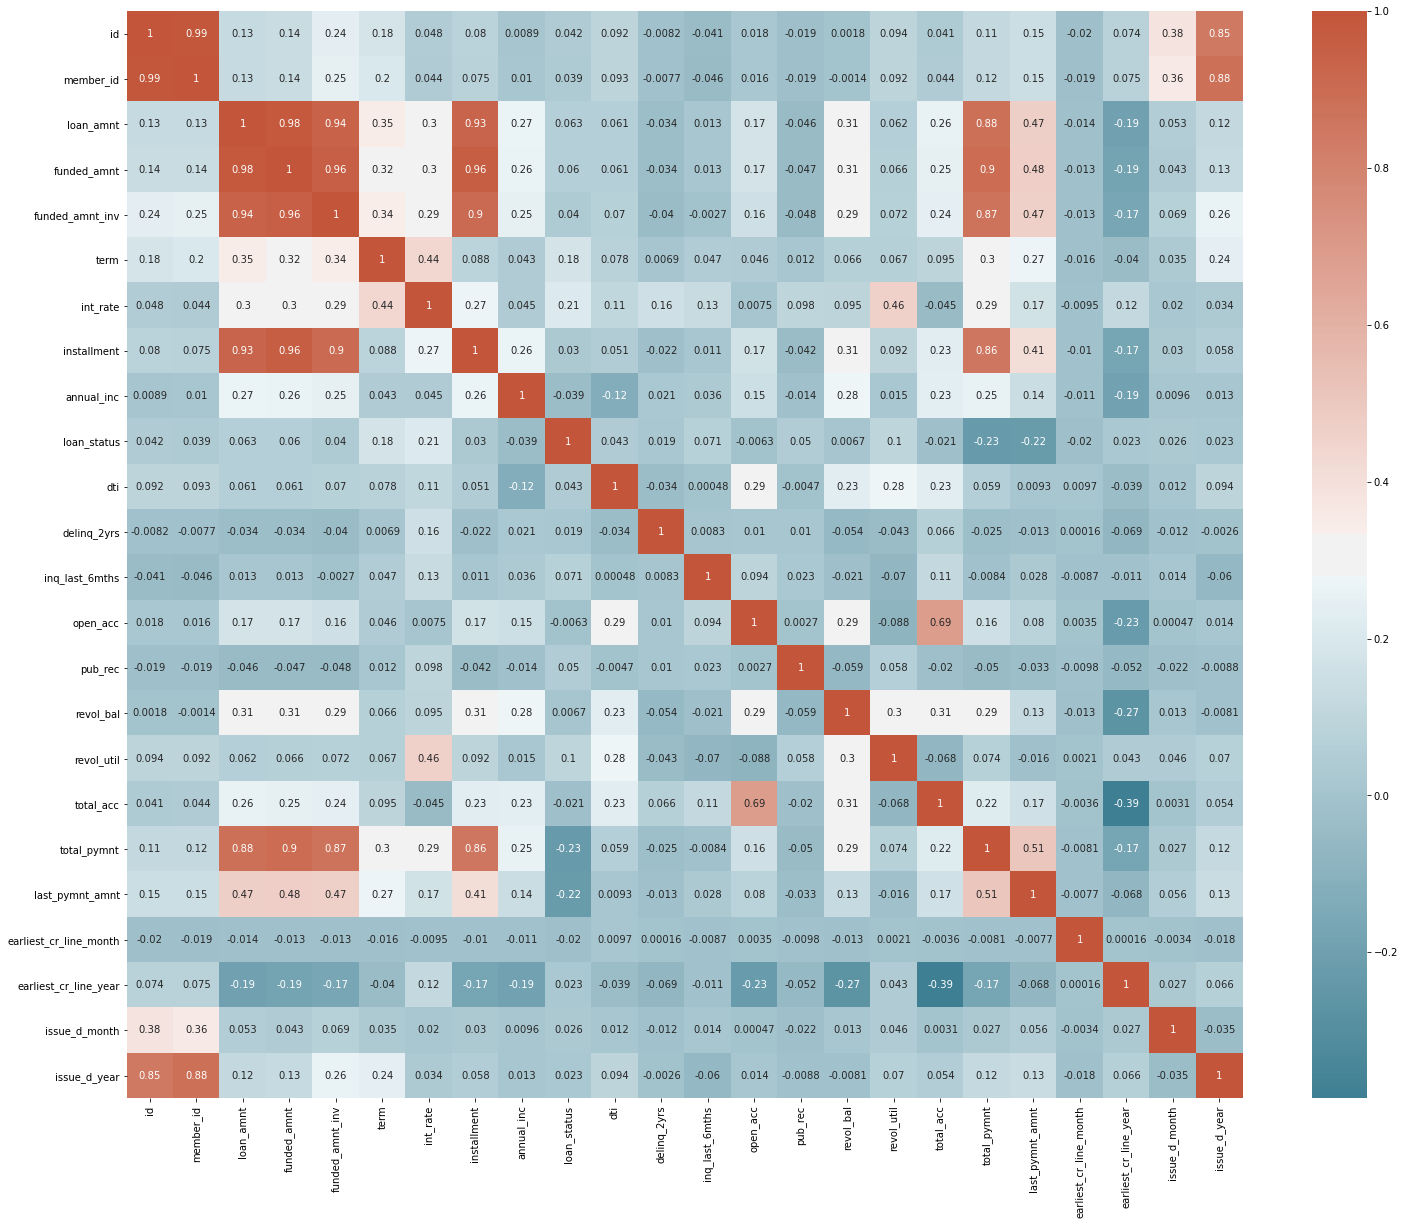

In [ ]:
plt.figure(figsize = (25,20))
corr = clean_data.corr()
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns,annot = True, 
            cmap = sns.diverging_palette(220,20,as_cmap = True))
plt.show()

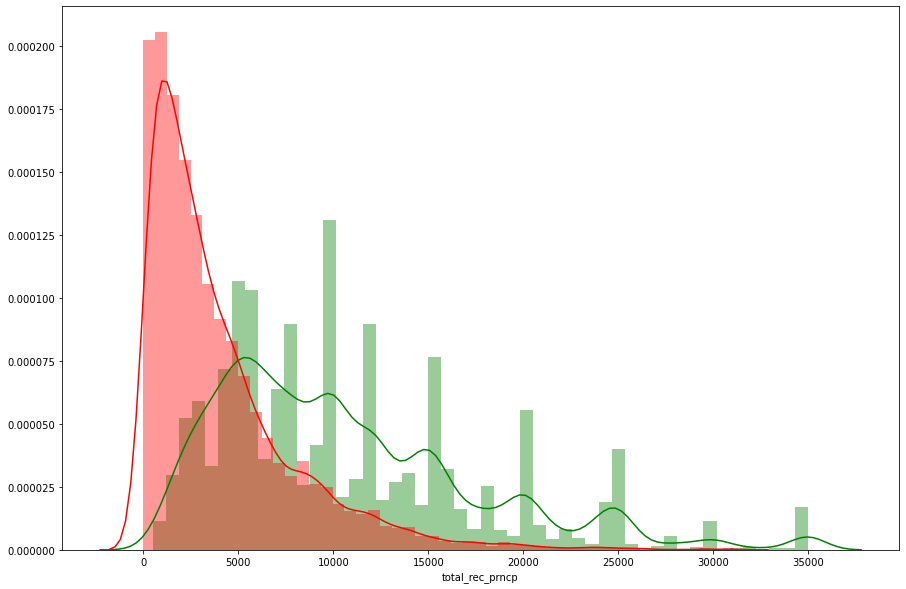

In [ ]:
# plotting default rates across grade of the loan
plt.figure(figsize = (15,10))
sns.distplot(fully_paid_data.total_rec_prncp,color = 'green')
sns.distplot(defaulted_data.total_rec_prncp,color = 'red')
plt.show()

#### The above 2 result sets helps us identify columns which can be deriving variables/factors, we can identify the features/columns based on the differences of distance in median in 2 data sets.
##### Below are the columns listed on higher level which can be proven deriving factors 
 ##### 1) funded_amnt_inv
 ##### 2) int_rate
 ##### 3) installment
 ##### 4) annual_inc
 ##### 5) dti
 ##### 6) revol_bal
 ##### 7) revol_util
 ##### 8) total_pymnt
 ##### 10) total_pymnt_inv
 ##### 11) total_rec_prncp
 ##### 12) total_rec_int
 ##### 13) recoveries
 ##### 14) collection_recovery_fee
 ##### 15) last_pymnt_amnt